In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from ydata_profiling import ProfileReport
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso

In [2]:
df1=pd.read_csv('Real estate.csv')
df1

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
df1.drop('No',axis=1,inplace=True)
df1

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [5]:
df1.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
df1.drop('X1 transaction date',axis=1,inplace=True)
df1

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [7]:
df1.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [8]:
df1.rename(columns={'X2 house age':'X2','X3 distance to the nearest MRT station':'X3',
       'X4 number of convenience stores':'X4','X5 latitude':'X5','X6 longitude':'X6',
       'Y house price of unit area':'Y'},inplace=True)
df1

,X2,X3,X4,X5,X6,Y
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [9]:
w=['X2', 'X3', 'X4', 'X5', 'X6']
w

['X2', 'X3', 'X4', 'X5', 'X6']

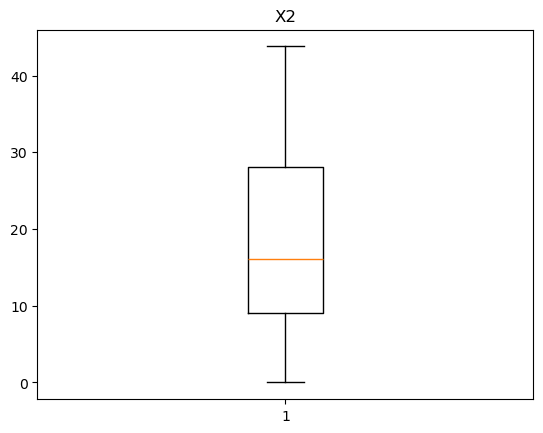

q1 9.025
q2 16.1
q3 28.15
iqr 19.125
upper 56.8375
lower -19.6625


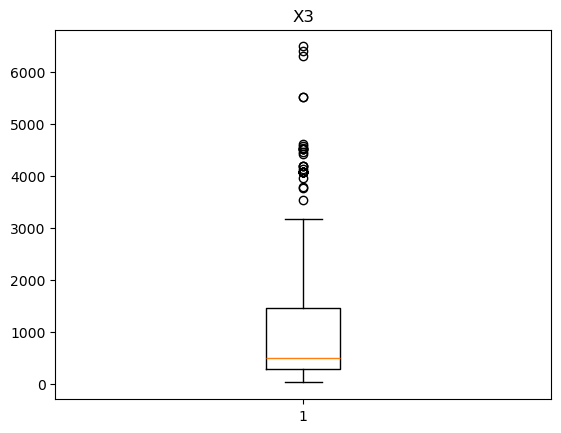

q1 289.3248
q2 492.2313
q3 1454.279
iqr 1164.9542000000001
upper 3201.7103
lower -1458.1065000000003


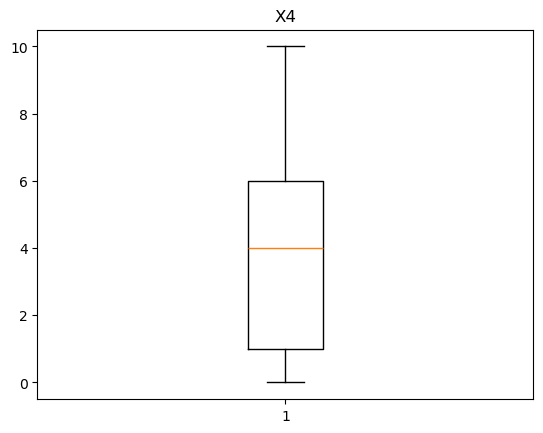

q1 1.0
q2 4.0
q3 6.0
iqr 5.0
upper 13.5
lower -6.5


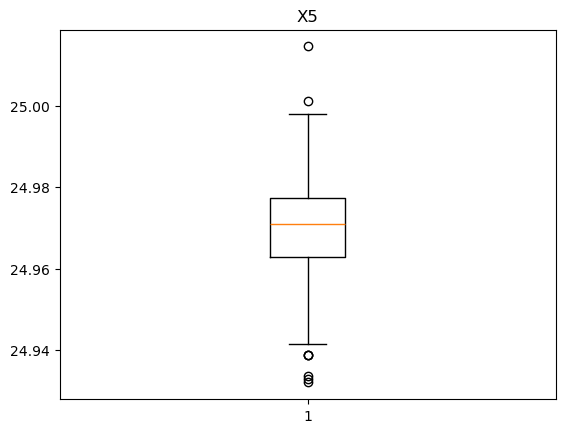

q1 24.963
q2 24.9711
q3 24.977455
iqr 0.014454999999998108
upper 24.999137499999996
lower 24.941317500000004


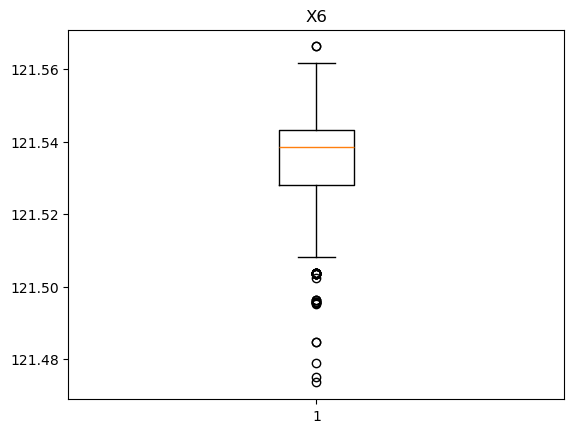

q1 121.528085
q2 121.53863
q3 121.543305
iqr 0.015219999999999345
upper 121.566135
lower 121.505255


In [10]:
for i in w:
    plt.boxplot(x=df1[i])
    plt.title(i)
    plt.show()
    
    q1=df1[i].quantile(0.25)
    q2=df1[i].quantile(0.50)
    q3=df1[i].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr

    print('q1',q1)
    print('q2',q2)
    print('q3',q3)
    print('iqr',iqr)
    print('upper',upper)
    print('lower',lower)

In [11]:
#remove outliers

In [12]:
df1

,X2,X3,X4,X5,X6,Y
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [13]:
df1.describe()

,X2,X3,X4,X5,X6,Y
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


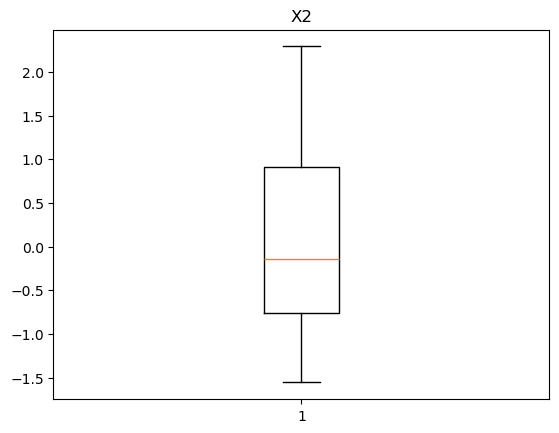

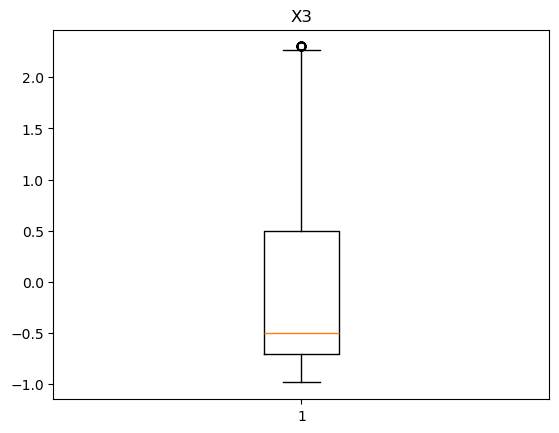

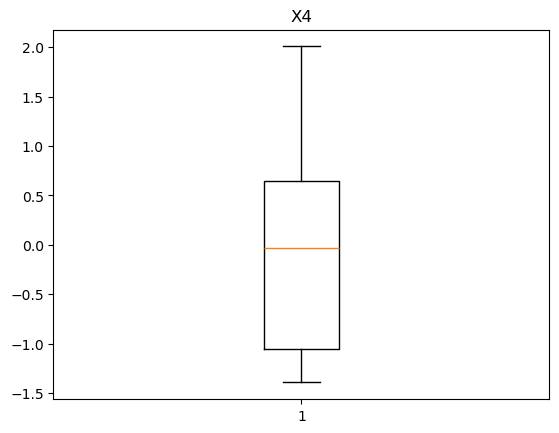

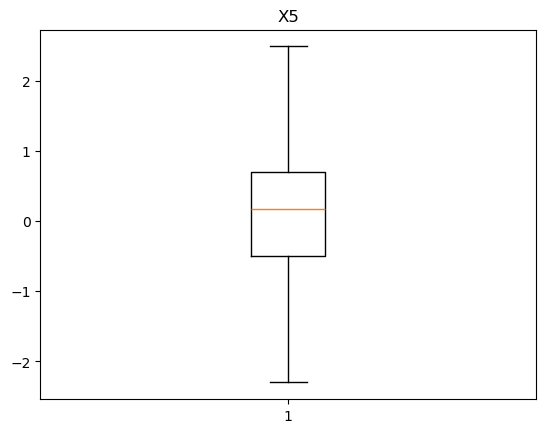

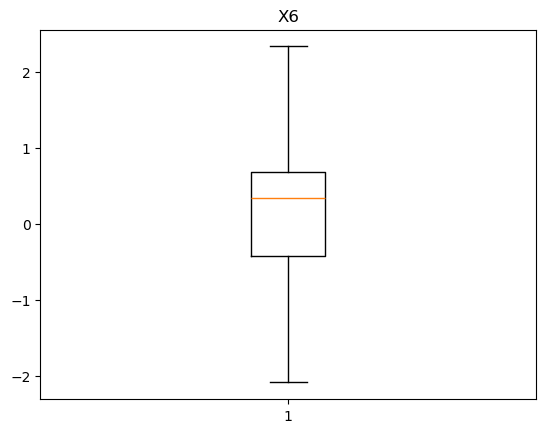

In [41]:
for i in w:
    plt.boxplot(x=df1[i])
    plt.title(i)
    plt.show()
    q1=df1[i].quantile(0.25)
    q2=df1[i].quantile(0.50)
    q3=df1[i].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr

    df1.loc[df1[i]>upper,i]=upper
    df1.loc[df1[i]<lower,i]=lower

In [42]:
df1

,X2,X3,X4,X5,X6,Y
0,1.255628,-0.919320,2.007407,1.153160,0.455298,37.9
1,0.157086,-0.690214,1.667503,0.934348,0.402256,42.2
2,-0.387791,-0.426312,0.307885,1.524476,0.721961,47.3
3,-0.387791,-0.426312,0.307885,1.524476,0.721961,54.8
4,-1.117223,-0.603441,0.307885,0.853951,0.615877,43.1
...,...,...,...,...,...,...
409,-0.352637,2.301396,-1.391638,-2.280691,-2.086720,15.4
410,-1.064493,-0.913557,1.667503,0.436220,0.663106,50.0
411,0.095568,-0.603027,0.987694,0.842348,0.427687,40.6
412,-0.844784,-0.898724,0.307885,-0.192864,0.486542,52.5


In [16]:
b=StandardScaler()

In [17]:
w

['X2', 'X3', 'X4', 'X5', 'X6']

In [18]:
for i in w:
    df1[i]=b.fit_transform(df1[[i]])

df1

,X2,X3,X4,X5,X6,Y
0,1.255628,-0.919320,2.007407,1.153160,0.455298,37.9
1,0.157086,-0.690214,1.667503,0.934348,0.402256,42.2
2,-0.387791,-0.426312,0.307885,1.524476,0.721961,47.3
3,-0.387791,-0.426312,0.307885,1.524476,0.721961,54.8
4,-1.117223,-0.603441,0.307885,0.853951,0.615877,43.1
...,...,...,...,...,...,...
409,-0.352637,2.301396,-1.391638,-2.280691,-2.086720,15.4
410,-1.064493,-0.913557,1.667503,0.436220,0.663106,50.0
411,0.095568,-0.603027,0.987694,0.842348,0.427687,40.6
412,-0.844784,-0.898724,0.307885,-0.192864,0.486542,52.5


In [43]:
df1['Y']=np.sqrt(df1['Y'])
df1

,X2,X3,X4,X5,X6,Y
0,1.255628,-0.919320,2.007407,1.153160,0.455298,6.156298
1,0.157086,-0.690214,1.667503,0.934348,0.402256,6.496153
2,-0.387791,-0.426312,0.307885,1.524476,0.721961,6.877500
3,-0.387791,-0.426312,0.307885,1.524476,0.721961,7.402702
4,-1.117223,-0.603441,0.307885,0.853951,0.615877,6.565059
...,...,...,...,...,...,...
409,-0.352637,2.301396,-1.391638,-2.280691,-2.086720,3.924283
410,-1.064493,-0.913557,1.667503,0.436220,0.663106,7.071068
411,0.095568,-0.603027,0.987694,0.842348,0.427687,6.371813
412,-0.844784,-0.898724,0.307885,-0.192864,0.486542,7.245688


In [44]:
skew(df1[w])

array([ 0.38153742,  1.21206098,  0.15404583, -0.45064567, -0.81487077])

In [21]:
report=ProfileReport(df1,explorative=True)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [45]:
df1.corr()

,X2,X3,X4,X5,X6,Y
X2,1.000000,-0.003782,0.049593,0.055848,-0.028578,-0.202532
X3,-0.003782,1.000000,-0.643701,-0.589290,-0.745523,-0.743267
X4,0.049593,-0.643701,1.000000,0.452041,0.448234,0.594487
X5,0.055848,-0.589290,0.452041,1.000000,0.395932,0.603927
X6,-0.028578,-0.745523,0.448234,0.395932,1.000000,0.547231
Y,-0.202532,-0.743267,0.594487,0.603927,0.547231,1.000000


In [46]:
x=df1.drop('Y',axis=1)

In [47]:
x

,X2,X3,X4,X5,X6
0,1.255628,-0.919320,2.007407,1.153160,0.455298
1,0.157086,-0.690214,1.667503,0.934348,0.402256
2,-0.387791,-0.426312,0.307885,1.524476,0.721961
3,-0.387791,-0.426312,0.307885,1.524476,0.721961
4,-1.117223,-0.603441,0.307885,0.853951,0.615877
...,...,...,...,...,...
409,-0.352637,2.301396,-1.391638,-2.280691,-2.086720
410,-1.064493,-0.913557,1.667503,0.436220,0.663106
411,0.095568,-0.603027,0.987694,0.842348,0.427687
412,-0.844784,-0.898724,0.307885,-0.192864,0.486542


In [48]:
y=df1['Y']

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=3)

In [134]:
x_train

,X2,X3,X4,X5,X6
57,-1.249048,-0.948671,0.987694,-0.963677,0.227871
313,-0.827208,-0.898724,0.307885,-0.192864,0.486542
203,-0.185659,-0.708060,0.307885,1.074421,0.690717
291,-1.257836,-0.948671,0.987694,-0.963677,0.227871
272,-0.414156,-0.498390,0.307885,-0.324648,0.246763
...,...,...,...,...,...
256,-0.273542,-0.656492,-1.051734,0.507499,-0.179026
131,-1.205106,1.211921,-0.371925,-0.503676,-1.535592
249,0.025261,2.301396,-1.051734,-0.964506,-2.086720
152,-0.502039,0.398445,-1.051734,-1.411247,1.049659


In [135]:
y_train

57     7.314369
313    6.542171
203    6.789698
291    7.375636
272    6.363961
         ...   
256    5.147815
131    5.540758
249    3.872983
152    5.375872
362    6.324555
Name: Y, Length: 207, dtype: float64

In [136]:
model=LinearRegression()

In [137]:
model.fit(x_train,y_train)

LinearRegression()

In [138]:
model.coef_

array([-0.24266046, -0.60907304,  0.17915172,  0.28488887, -0.02884036])

In [139]:
model.intercept_

6.07110024400569

In [140]:
y_pred=model.predict(x_test)
y_pred

array([6.38316076, 6.6062633 , 6.70200491, 6.73343384, 5.54158259,
       6.09802055, 3.91607685, 6.87594479, 7.16931937, 7.16931937,
       7.04244606, 6.14475987, 7.03851472, 6.74894041, 6.69937824,
       6.85393784, 6.83608463, 5.29807356, 6.25976246, 4.26736533,
       6.93918699, 4.94420044, 5.09672554, 4.60496341, 6.60421342,
       6.60809213, 5.94506152, 6.15042852, 4.95540324, 7.05212164,
       6.21444896, 6.46610227, 6.92527156, 3.91394426, 6.60810963,
       6.25816554, 6.89776483, 6.97504715, 6.93918699, 6.41797125,
       6.80113559, 6.33445592, 5.74423813, 6.33179629, 6.2192436 ,
       6.92072901, 6.00457722, 3.91271952, 3.91820943, 5.53931192,
       6.40056756, 6.44793493, 6.73343384, 6.43603777, 5.06540997,
       3.86534387, 5.46851093, 5.49224015, 6.27259183, 5.3252371 ,
       6.6141532 , 6.94131957, 6.74894041, 3.66211475, 5.32950226,
       6.51060792, 5.44566547, 6.55102544, 6.84377428, 5.30716463,
       5.51464452, 6.02686291, 6.42942364, 6.15849001, 6.93883

In [141]:
y_test

161    6.292853
130    6.123724
227    6.340347
103    6.760178
240    5.366563
         ...   
248    4.722288
21     7.183314
273    5.412947
108    5.839521
177    6.480741
Name: Y, Length: 207, dtype: float64

In [142]:
residual=y_test-y_pred

<Axes: xlabel='Y', ylabel='Density'>

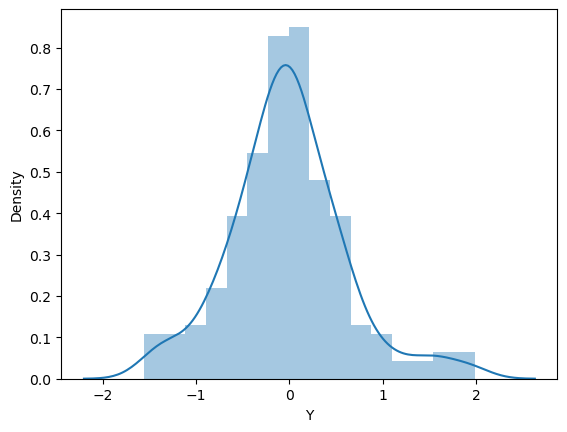

In [143]:
sns.distplot(residual)

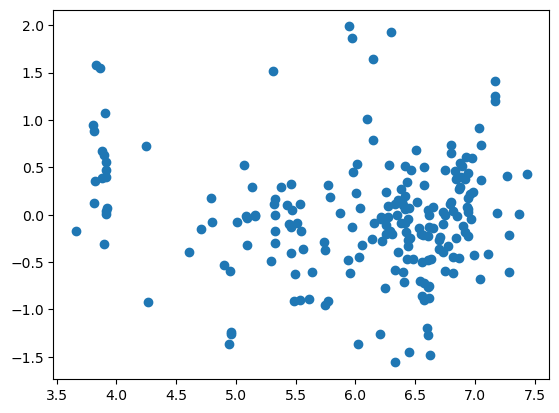

In [144]:
plt.scatter(y_pred,residual)
plt.show()

In [145]:
#training data
y_pred_train=model.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
mae=mean_absolute_error(y_train,y_pred_train)
train=r2_score(y_train,y_pred_train)
print('mse',mse)
print('mae',mae)
print('train',train)

mse 0.46711175514288167
mae 0.43488987467332485
train 0.6581942507528875


In [146]:
#testing data
y_pred_test=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
test=r2_score(y_test,y_pred_test)
print('mse',mse)
print('mae',mae)
print('test',test)

mse 0.38628767502371636
mae 0.4552936455945255
test 0.6623399891029971


In [177]:
l1=Lasso(0.05)

In [178]:
l1.fit(x_train,y_train)

Lasso(alpha=0.05)

In [179]:
l1.score(x_train,y_train)

0.653171798669127

In [180]:
l1.score(x_test,y_test)

0.6599644825098305